In [54]:
DET_NICKNAME = 'LW_f277w-f356w-f444w'
KERNEL = 'f444w'
APERSIZE = '0_7'

import sys, os

DIR_CONFIG = '/Volumes/External1/Projects/Current/UNCOVER/scripts/'
sys.path.insert(0, DIR_CONFIG)
from config import DIR_CATALOGS, DET_TYPE, PHOT_ZP, TARGET_ZPT, TRANSLATE_FNAME, DIR_OUTPUT

FULLDIR_CATALOGS = os.path.join(DIR_CATALOGS, f'{DET_NICKNAME}_{DET_TYPE}/{KERNEL}/')
translate_file = os.path.join(DIR_CONFIG, TRANSLATE_FNAME)


In [74]:
import eazy
print(eazy.__version__)

# Symlink templates & filters from the eazy-code repository
print('EAZYCODE = '+os.getenv('EAZYCODE'))

eazy.symlink_eazy_inputs() 

params = {}

params['CATALOG_FILE'] = os.path.join(FULLDIR_CATALOGS, f'{DET_NICKNAME}_K{KERNEL}_SCIREADY_{APERSIZE}_CATALOG.fits')
params['MAIN_OUTPUT_FILE'] = os.path.join(FULLDIR_CATALOGS, f'{DET_NICKNAME}_K{KERNEL}_SCIREADY_{APERSIZE}_CATALOG.eazypy')

params['APPLY_PRIOR'] = 'n'
params['PRIOR_ABZP'] = TARGET_ZPT
params['MW_EBV'] = 0.0
params['CAT_HAS_EXTCORR'] = 'y'

params['Z_MAX'] = 20
params['Z_STEP'] = 0.1

params['TEMPLATES_FILE'] = 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'

params['VERBOSITY'] = 1
ez = eazy.photoz.PhotoZ(translate_file=translate_file,
                              zeropoint_file=None, params=params,
                              load_prior=True, load_products=True)

0.5.2.dev45
EAZYCODE = /Users/jweaver/Projects/Common/software/eazy-photoz
/Users/jweaver/Projects/Common/software/eazy-py/eazy/data/templates -> ./templates
/Users/jweaver/Projects/Common/software/eazy-py/eazy/data/filters/FILTER.RES.latest -> ./FILTER.RES.latest
Read default param file: /Users/jweaver/Projects/Common/software/eazy-py/eazy/data/zphot.param.default
Read CATALOG_FILE: /Volumes/External1/Projects/Current/UNCOVER/data/vTest/catalogs/LW_f277w-f356w-f444w_noise-equal/f444w/LW_f277w-f356w-f444w_Kf444w_SCIREADY_0_7_CATALOG.fits
   >>> NOBJ = 10904
f_f105w e_f105w (206): hst/wfc3/UVIS/f218w.dat
f_f125w e_f125w (203): hst/wfc3/IR/f125w.dat
f_f140w e_f140w (204): hst/wfc3/IR/f140w.dat
f_f160w e_f160w (205): hst/wfc3/IR/f160w.dat
f_f150w e_f150w (365): jwst_nircam_f150w
f_f200w e_f200w (366): jwst_nircam_f200w
f_f277w e_f277w (375): jwst_nircam_f277w
f_f356w e_f356w (376): jwst_nircam_f356w
f_f444w e_f444w (377): jwst_nircam_f444w
Set sys_err = 0.01 (positive=True)


/Users/jweaver/Projects/Common/software/eazy-py/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Read PRIOR_FILE:  templates/prior_F160W_TAO.dat
Template grid: templates/fsps_full/tweak_fsps_QSF_12_v3.param (this may take some time)


100%|██████████| 12/12 [00:10<00:00,  1.12it/s]


Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 11.593 s


31it [00:00, 385.37it/s]


Load products: /Volumes/External1/Projects/Current/UNCOVER/data/vTest/catalogs/LW_f277w-f356w-f444w_noise-equal/f444w/LW_f277w-f356w-f444w_Kf444w_SCIREADY_0_7_CATALOG.eazypy.zout.fits


/Users/jweaver/Projects/Common/software/eazy-py/eazy/photoz.py:1137: RuntimeWarning: divide by zero encountered in log
  ln_fit_beta_y = np.log(fit_beta_y)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


 ... Fit templates at zout[z_phot] 
fit_best: 1.7 s (n_proc=1,  NOBJ=9253)


UVJ classification

In [75]:
import numpy as np

u_v = -2.5*np.log10(ez.zout['restU'] / ez.zout['restV'])
v_j = -2.5*np.log10(ez.zout['restV'] / ez.zout['restJ'])

def uvj_sel(v_j):
    ret = 0.72*v_j + 0.75
    ret[v_j >= 1.6] = 1E20
    ret[v_j < 0.9] = 1.4
    return ret

clas = np.nan * np.ones(len(ez.zout), dtype=int)
out = uvj_sel(v_j)
clas[u_v >= out] = 1 # QG
clas[u_v < out] = 0 # SF
clas[(u_v > 2.4) | (u_v < 0.0) | (v_j < -0.6)  | (v_j > 2.0)] = -1
clas[np.isnan(u_v) | np.isnan(v_j)] = -1

ez.zout['u_v'] = u_v
ez.zout['v_j'] = v_j
ez.zout['uvj_class'] = clas


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/pyth

Total Sample Properties

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


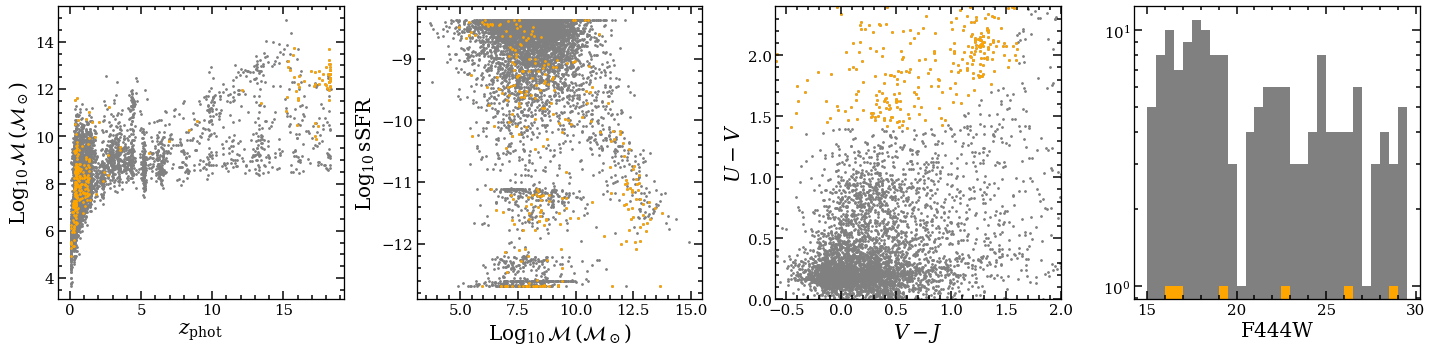

In [76]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(4*5, 5))

qg = ez.zout['uvj_class'] == 1
selection = ez.cat['use_phot'] == 1

# z vs. M
axes[0].scatter(ez.zout['z_phot'][selection], np.log10(ez.zout['mass'][selection]), s=3, c='grey')
axes[0].scatter(ez.zout['z_phot'][qg & selection], np.log10(ez.zout['mass'][qg & selection]), s=3, c='orange')
axes[0].set(xlabel='$z_{\\rm phot}$', ylabel='Log$_{10}\,\mathcal{M}\,(\mathcal{M}_\odot)$')

# M vs. SFR
axes[1].scatter(np.log10(ez.zout['mass'][selection]), np.log10(ez.zout['sfr']/ez.zout['mass'])[selection], s=3, c='grey')
axes[1].scatter(np.log10(ez.zout['mass'][qg & selection]), np.log10(ez.zout['sfr'][qg & selection]/ez.zout['mass'][qg & selection]), s=3, c='orange')
axes[1].set(xlabel='Log$_{10}\,\mathcal{M}\,(\mathcal{M}_\odot)$', ylabel='Log$_{10}\,{\\rm sSFR}}\,(\mathcal{M}_\odot\,{\\rm yr}^{-1})$')

# UVJ
axes[2].scatter(ez.zout['v_j'][selection], ez.zout['u_v'][selection], s=3, c='grey')
axes[2].scatter(ez.zout['v_j'][qg & selection], ez.zout['u_v'][qg & selection], s=3, c='orange')
axes[2].set(xlabel='$V-J$', ylabel='$U-V$', xlim=(-0.6, 2.0), ylim=(0, 2.4))

# F444W
bins = np.arange(15, 30, 0.5)
axes[3].hist(ez.cat['f_f444w'][selection], bins=bins, color='grey')
axes[3].hist(ez.cat['f_f444w'][qg & selection], bins=bins, color='orange')
axes[3].set(xlabel='F444W')
axes[3].semilogy()

fig.tight_layout()



Sample Selection

In [87]:
Z_RANGE = (0.5, 1)
MASS_RANGE = (1e7, 1e12)
SFR_RANGE = (0, 1e31)
MAG_RANGE = (20, 21)
MAG_FILT = 'f444w'
UVJ_TYPE = (0, 1, -1) # 0 - SFG, 1 - QG
USE_PHOT = 1
NUSEFILT = 9

def select_between(x, lo, hi):
    return (x > lo) & (x <= hi)

selection = np.zeros(len(ez.cat), dtype=bool)
selection[select_between(ez.zout['z_phot'], Z_RANGE[0], Z_RANGE[1])
          & select_between(ez.zout['mass'], MASS_RANGE[0], MASS_RANGE[1]) 
          & select_between(ez.zout['sfr'], SFR_RANGE[0], SFR_RANGE[1])
          # & select_between(ez.cat[f'f_{MAG_FILT}'], MAG_RANGE[0], MAG_RANGE[1]) 
          & np.isin(ez.zout['uvj_class'], UVJ_TYPE)
          & (ez.cat['use_phot'] == 1)
          & (ez.cat['NUSEFILT'] >= 9)
            ] = True

print(f'Selection contains {selection.sum()} objects')

Selection contains 1825 objects


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


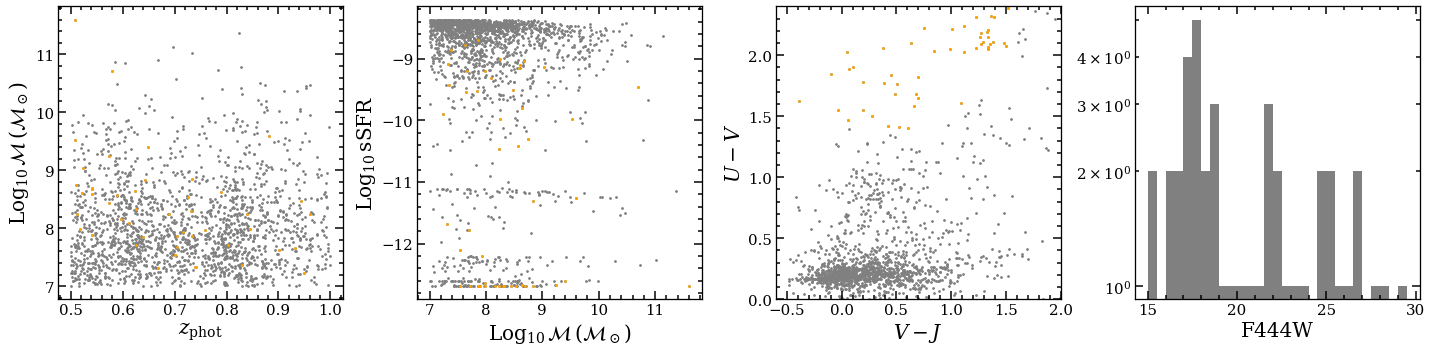

In [88]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(4*5, 5))

qg = ez.zout['uvj_class'] == 1

# z vs. M
axes[0].scatter(ez.zout['z_phot'][selection], np.log10(ez.zout['mass'][selection]), s=3, c='grey')
axes[0].scatter(ez.zout['z_phot'][qg & selection], np.log10(ez.zout['mass'][qg & selection]), s=3, c='orange')
axes[0].set(xlabel='$z_{\\rm phot}$', ylabel='Log$_{10}\,\mathcal{M}\,(\mathcal{M}_\odot)$')

# M vs. SFR
axes[1].scatter(np.log10(ez.zout['mass'][selection]), np.log10(ez.zout['sfr']/ez.zout['mass'])[selection], s=3, c='grey')
axes[1].scatter(np.log10(ez.zout['mass'][qg & selection]), np.log10(ez.zout['sfr'][qg & selection]/ez.zout['mass'][qg & selection]), s=3, c='orange')
axes[1].set(xlabel='Log$_{10}\,\mathcal{M}\,(\mathcal{M}_\odot)$', ylabel='Log$_{10}\,{\\rm sSFR}}\,(\mathcal{M}_\odot\,{\\rm yr}^{-1})$')

# UVJ
axes[2].scatter(ez.zout['v_j'][selection], ez.zout['u_v'][selection], s=3, c='grey')
axes[2].scatter(ez.zout['v_j'][qg & selection], ez.zout['u_v'][qg & selection], s=3, c='orange')
axes[2].set(xlabel='$V-J$', ylabel='$U-V$', xlim=(-0.6, 2.0), ylim=(0, 2.4))

# F444W
bins = np.arange(15, 30, 0.5)
axes[3].hist(ez.cat['f_f444w'][selection], bins=bins, color='grey')
axes[3].hist(ez.cat['f_f444w'][qg & selection], bins=bins, color='orange')
axes[3].set(xlabel='F444W')
axes[3].semilogy()

fig.tight_layout()



<SkyCoord (ICRS): (ra, dec) in deg
    (3.65268007, -30.44337628)>


/usr/local/anaconda3/lib/python3.7/site-packages/astropy/stats/sigma_clipping.py:58: RuntimeWarning: Mean of empty slice
  return bottleneck.nanmean(array, axis=axis)
/Users/jweaver/Projects/Software/aperpy/src/webb_tools.py:406: RuntimeWarning: All-NaN slice encountered
  scale = np.nanmax(img)
/usr/local/anaconda3/lib/python3.7/site-packages/astropy/stats/sigma_clipping.py:58: RuntimeWarning: Mean of empty slice
  return bottleneck.nanmean(array, axis=axis)
/Users/jweaver/Projects/Software/aperpy/src/webb_tools.py:406: RuntimeWarning: All-NaN slice encountered
  scale = np.nanmax(img)
/usr/local/anaconda3/lib/python3.7/site-packages/astropy/stats/sigma_clipping.py:58: RuntimeWarning: Mean of empty slice
  return bottleneck.nanmean(array, axis=axis)
/Users/jweaver/Projects/Software/aperpy/src/webb_tools.py:406: RuntimeWarning: All-NaN slice encountered
  scale = np.nanmax(img)
/usr/local/anaconda3/lib/python3.7/site-packages/astropy/stats/sigma_clipping.py:58: RuntimeWarning: Mean of 

FileNotFoundError: [Errno 2] No such file or directory: 'cutouts/7.pdf'

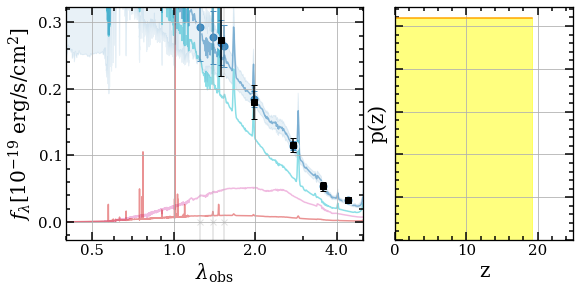

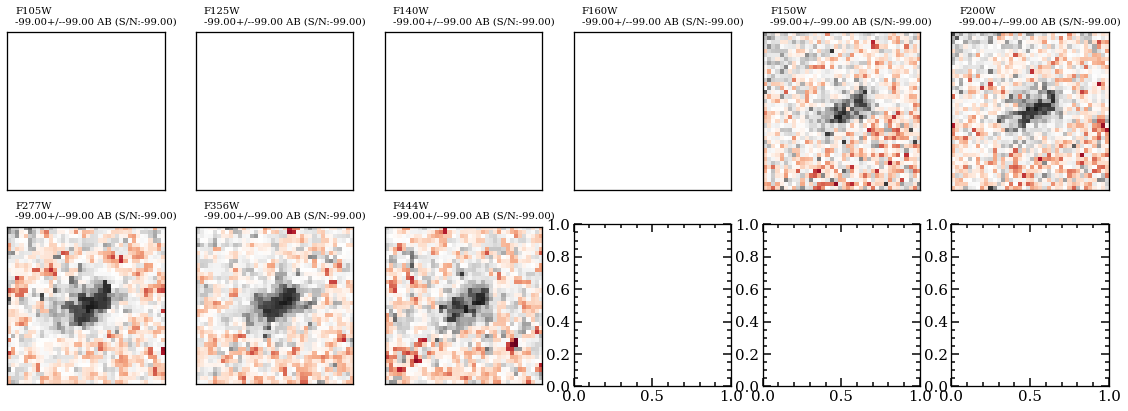

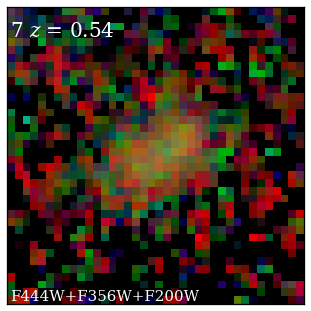

In [90]:
from aperpy.src.webb_tools import make_cutout
import matplotlib.pyplot as plt

for obj in ez.cat[selection][:10]:
    id = obj['id']
    fig, data = ez.show_fit(id, xlim=[0.4, 5], show_components=True,
                              logpz=False, zr=[0,25], show_fnu=False, add_label=False) #, zshow=self.cat['z_spec'][sel][so][i])
    
    ra, dec = obj['ra'], obj['dec']
    make_cutout(ra, dec, 1.5, id, PHOT_ZP, DIR_OUTPUT, row=obj, rgb=['f444w', 'f356w', 'f200w'], write=False, include_rgb=True, redshift=data['z'])

    plt.pause(0.01)

'/Users/jweaver/Projects/Common/py_tools/webb_tools.py'